## 1.06 Plotting Data with Pandas

In this section we will use pandas `pd.plot()` method on a DataFrame to plot columns directly.

Plot types:
* `Line plot`
* `Scatter plot`
* `Bar plot`
* `Histogram`
* `Subplots`
* `OO plot`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Lets import the car_sales dataset
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


___
### Line Plot

In [3]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range("1/1/2021", 
               periods=1000))
ts

2021-01-01   -1.975141
2021-01-02    0.814618
2021-01-03   -0.410338
2021-01-04    1.538123
2021-01-05    0.223192
                ...   
2023-09-23    1.499453
2023-09-24   -0.091990
2023-09-25   -1.037537
2023-09-26   -0.367542
2023-09-27    0.238691
Freq: D, Length: 1000, dtype: float64

In [4]:
# What does cumsum() do?
# cumsum() is a method that returns a new series with the cumulative sum of the values.
ts.cumsum()

2021-01-01    -1.975141
2021-01-02    -1.160523
2021-01-03    -1.570861
2021-01-04    -0.032738
2021-01-05     0.190453
                ...    
2023-09-23   -25.590695
2023-09-24   -25.682685
2023-09-25   -26.720221
2023-09-26   -27.087763
2023-09-27   -26.849072
Freq: D, Length: 1000, dtype: float64

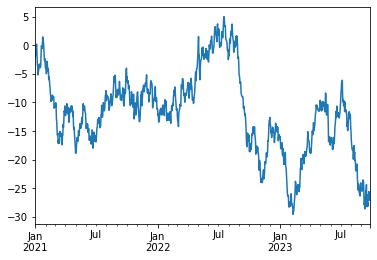

In [5]:
ts.cumsum().plot();


***Working with actual data***

Let's do a little data manipulation on our `car_sales` DataFrame.

In [6]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [7]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "")
car_sales

<ipython-input-7-ab0c618254a3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "")


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


> Note: regex is a regular expression that is used to find the pattern in the string and replace it with the new string.

In [8]:
# Remove the last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [9]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2021", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2021-01-01
1,Honda,Red,87899,4,5000,2021-01-02
2,Toyota,Blue,32549,3,7000,2021-01-03
3,BMW,Black,11179,5,22000,2021-01-04
4,Nissan,White,213095,4,3500,2021-01-05
5,Toyota,Green,99213,4,4500,2021-01-06
6,Honda,Blue,45698,4,7500,2021-01-07
7,Honda,Blue,54738,4,7000,2021-01-08
8,Toyota,White,60000,4,6250,2021-01-09
9,Nissan,White,31600,4,9700,2021-01-10


In [10]:
# Make total sakes column (doesn't work, adds as string)
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2021-01-01,4000
1,Honda,Red,87899,4,5000,2021-01-02,40005000
2,Toyota,Blue,32549,3,7000,2021-01-03,400050007000
3,BMW,Black,11179,5,22000,2021-01-04,40005000700022000
4,Nissan,White,213095,4,3500,2021-01-05,400050007000220003500
5,Toyota,Green,99213,4,4500,2021-01-06,4000500070002200035004500
6,Honda,Blue,45698,4,7500,2021-01-07,40005000700022000350045007500
7,Honda,Blue,54738,4,7000,2021-01-08,400050007000220003500450075007000
8,Toyota,White,60000,4,6250,2021-01-09,4000500070002200035004500750070006250
9,Nissan,White,31600,4,9700,2021-01-10,40005000700022000350045007500700062509700


In [11]:
car_sales["Price"].dtype, type(car_sales["Price"][0])

(dtype('O'), str)

In [12]:
# Convert the price column to integers and then add
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales 

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2021-01-01,4000
1,Honda,Red,87899,4,5000,2021-01-02,9000
2,Toyota,Blue,32549,3,7000,2021-01-03,16000
3,BMW,Black,11179,5,22000,2021-01-04,38000
4,Nissan,White,213095,4,3500,2021-01-05,41500
5,Toyota,Green,99213,4,4500,2021-01-06,46000
6,Honda,Blue,45698,4,7500,2021-01-07,53500
7,Honda,Blue,54738,4,7000,2021-01-08,60500
8,Toyota,White,60000,4,6250,2021-01-09,66750
9,Nissan,White,31600,4,9700,2021-01-10,76450


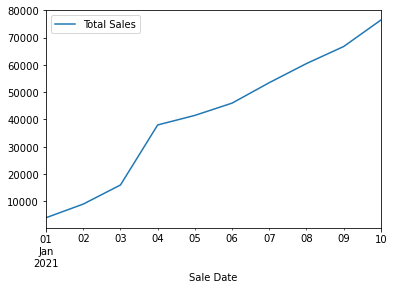

In [13]:
car_sales.plot(x="Sale Date", y="Total Sales");

___
### Scatter Plot

In [14]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2021-01-01,4000
1,Honda,Red,87899,4,5000,2021-01-02,9000
2,Toyota,Blue,32549,3,7000,2021-01-03,16000
3,BMW,Black,11179,5,22000,2021-01-04,38000
4,Nissan,White,213095,4,3500,2021-01-05,41500
5,Toyota,Green,99213,4,4500,2021-01-06,46000
6,Honda,Blue,45698,4,7500,2021-01-07,53500
7,Honda,Blue,54738,4,7000,2021-01-08,60500
8,Toyota,White,60000,4,6250,2021-01-09,66750
9,Nissan,White,31600,4,9700,2021-01-10,76450


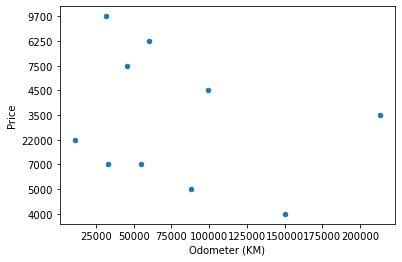

In [15]:
# Plot the odometer vs price as a scatter plot (Plots price as string!!!)
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [16]:
car_sales["Price"].dtype, type(car_sales["Price"][0])

(dtype('O'), str)

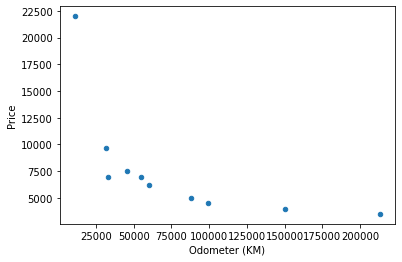

In [17]:
# Error may occur if y column is not an integer
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

___
### Bar Plot

In [18]:
x = np.random.rand(10, 4)
x

array([[0.63333688, 0.51306893, 0.91253741, 0.8542249 ],
       [0.25527654, 0.05279761, 0.13348106, 0.5665322 ],
       [0.92029963, 0.08207775, 0.91748735, 0.22376752],
       [0.25176701, 0.71750701, 0.19079226, 0.45002468],
       [0.71678991, 0.77168192, 0.28497694, 0.00451207],
       [0.44801518, 0.62415168, 0.47089325, 0.58230918],
       [0.14019889, 0.50868984, 0.37890892, 0.4822355 ],
       [0.21333724, 0.05990285, 0.25251578, 0.157511  ],
       [0.29551449, 0.69702309, 0.63558801, 0.59050506],
       [0.45778458, 0.53469404, 0.25486464, 0.2978277 ]])

In [19]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.633337,0.513069,0.912537,0.854225
1,0.255277,0.052798,0.133481,0.566532
2,0.920300,0.082078,0.917487,0.223768
3,0.251767,0.717507,0.190792,0.450025
4,0.716790,0.771682,0.284977,0.004512
5,0.448015,0.624152,0.470893,0.582309
6,0.140199,0.508690,0.378909,0.482236
7,0.213337,0.059903,0.252516,0.157511
8,0.295514,0.697023,0.635588,0.590505
9,0.457785,0.534694,0.254865,0.297828


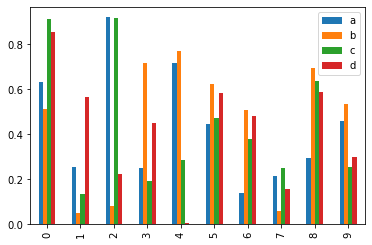

In [20]:
df.plot.bar();

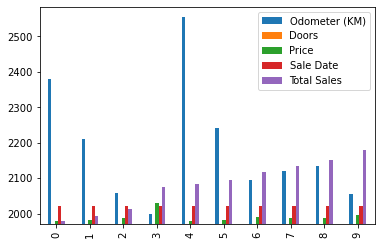

In [23]:
# Can do the same thing with `kind` keyword
car_sales.plot(kind='bar');

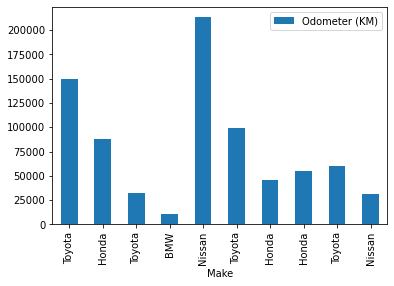

In [24]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

In [4]:
# Exercise: Try to recreate the plot above, grouping by make.
data = car_sales.groupby(["Make"]).mean()
data

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


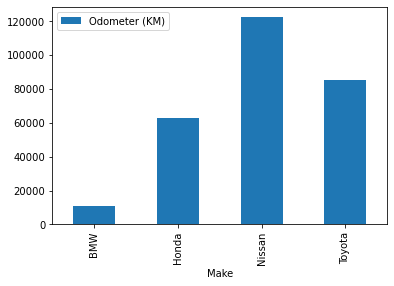

In [6]:
data.plot(y='Odometer (KM)', kind='bar');

___
### Histogram

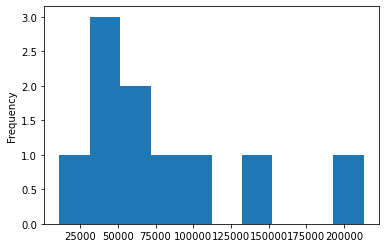

In [25]:
car_sales['Odometer (KM)'].plot.hist();

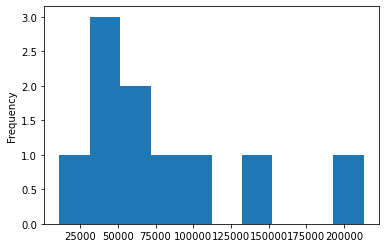

In [26]:
car_sales['Odometer (KM)'].plot(kind='hist');

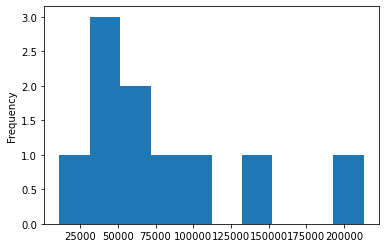

In [31]:
# Default number of bins is 10
car_sales["Odometer (KM)"].plot.hist(bins=10);

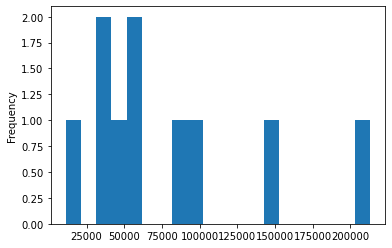

In [32]:
car_sales["Odometer (KM)"].plot.hist(bins=20);

In [9]:
# Let's try with another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


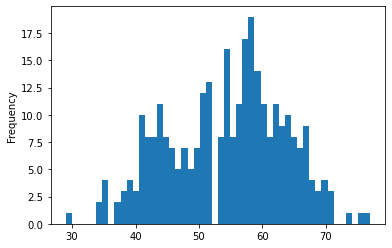

In [10]:
# Create a histogram of age.
heart_disease["age"].plot.hist(bins=50);

___
### Subplots

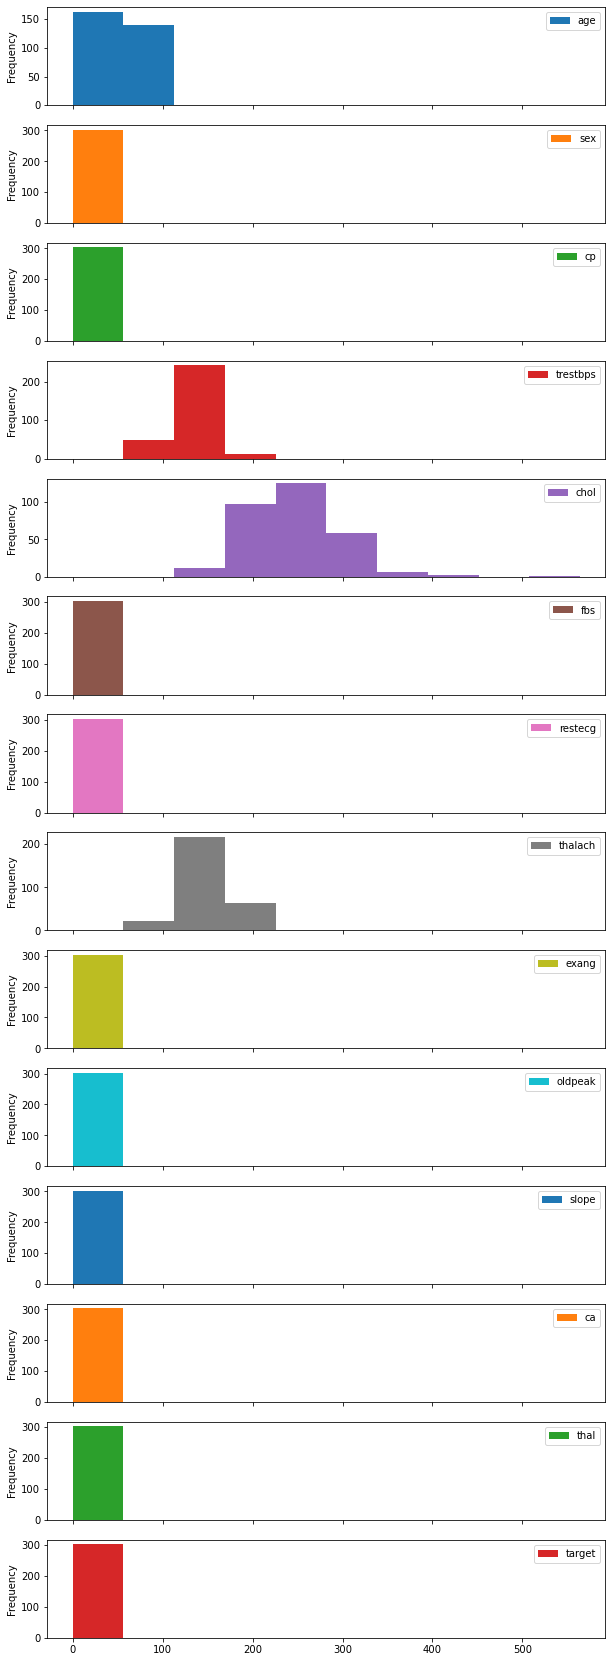

In [14]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

___
### Object Oriented Plotting

Which plotting method should you use? (pyplot vs matplotlib OO method?)
* When plotting something quickly, it is ok to use the `pyplot` method.
* When plotting something more advanced, use `OO method`.

In [62]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
# Perform data analysis on patients over 50.
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [50]:
len(heart_disease), len(over_50)

(303, 208)

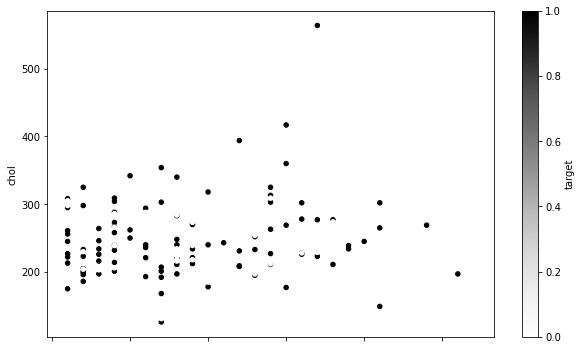

In [54]:
# PyPlot Method - plotting directly from the pandas dataframe using `plot()`
over_50.plot(kind='scatter', 
             x='age', 
             y='chol', 
             c='target', 
             figsize=(10, 6));

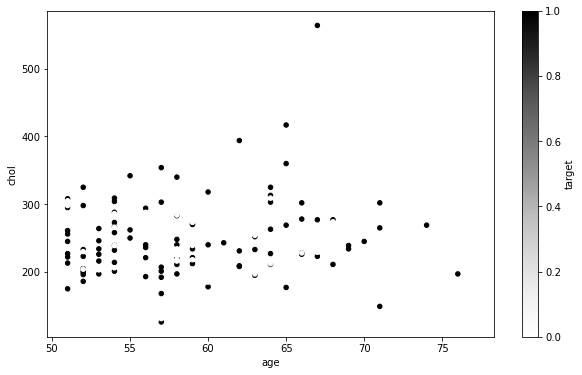

In [59]:
# OO Method mixed with pyplot method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target', # change the color of the dot depending on what the target value is
             ax=ax); # plot the above data(x, y, c) on the axis we just created (ax)

# We can change the size of the axes...
# ax.set_xlim([45, 100]);

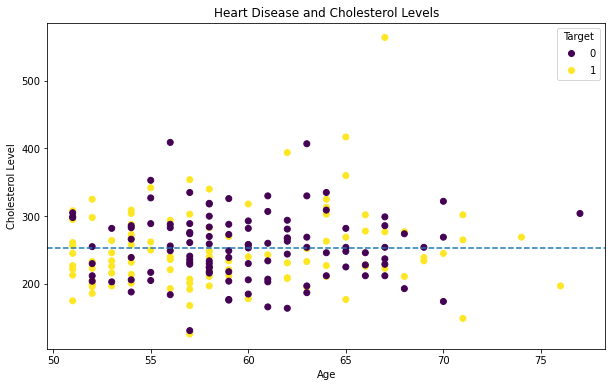

In [64]:
# oo method from scratch: A more complex plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], over_50["chol"], c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol Level");
ax.legend(*scatter.legend_elements(), title="Target"); 
# grab the values from scatter, and unpack the legend elements, 
# which is going to queerey the c parameter, and look back at the
# df and look at what values are in the target column (1s and 0s)
# then its going to create a legend built off of those elements

# Add a mean line
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

### Object Orienten Subplots

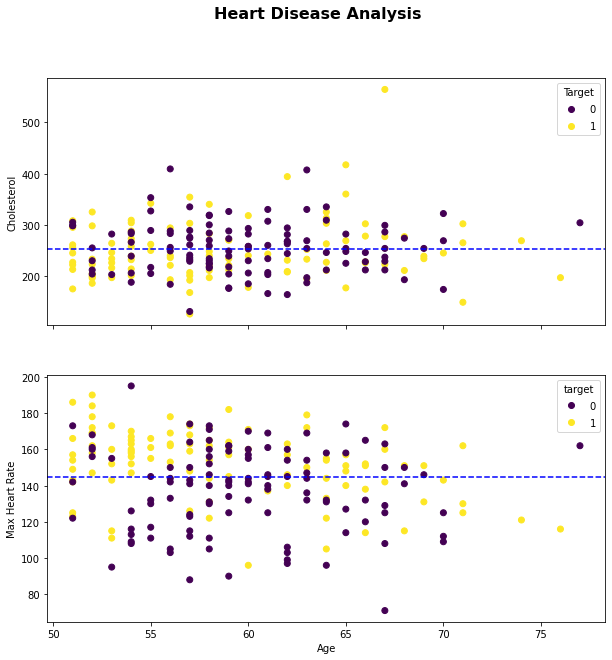

In [79]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], over_50["chol"], c=over_50["target"])

# Customize ax0
ax0.set(ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), color="b", linestyle="--", label="Average")

# Add data for ax1
scatter = ax1.scatter(over_50["age"], over_50["thalach"], c=over_50["target"])

# Customize ax1
ax1.set(xlabel="Age", ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="target")

# Set up a mean line
ax1.axhline(y=over_50["thalach"].mean(), color="b", linestyle="--", label="Average")

# Title the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");